In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import sys
import os

In [2]:
df = pd.read_csv('../data/clean_data.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148935 entries, 0 to 148934
Data columns (total 45 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Bearer Id                       148935 non-null  float64
 1   Start                           148935 non-null  object 
 2   Start ms                        148935 non-null  float64
 3   End                             148935 non-null  object 
 4   End ms                          148935 non-null  float64
 5   Dur. (ms)                       148935 non-null  float64
 6   IMSI                            148935 non-null  float64
 7   MSISDN/Number                   148935 non-null  float64
 8   IMEI                            148935 non-null  float64
 9   Last Location Name              148935 non-null  object 
 10  Avg RTT DL (ms)                 148935 non-null  float64
 11  Avg RTT UL (ms)                 148935 non-null  float64
 12  Avg Bearer TP DL

In [4]:
df.columns

Index(['Bearer Id', 'Start', 'Start ms', 'End', 'End ms', 'Dur. (ms)', 'IMSI',
       'MSISDN/Number', 'IMEI', 'Last Location Name', 'Avg RTT DL (ms)',
       'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)',
       'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)',
       '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)',
       'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)',
       '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)',
       'Activity Duration DL (ms)', 'Activity Duration UL (ms)', 'Dur. (ms).1',
       'Handset Manufacturer', 'Handset Type', 'Nb of sec with Vol DL < 6250B',
       'Nb of sec with Vol UL < 1250B', 'Social Media DL (Bytes)',
       'Social Media UL (Bytes)', 'Google DL (Bytes)', 'Google UL (Bytes)',
       'Email DL (Bytes)', 'Email UL (Bytes)', 'Youtube DL (Bytes)',
       'Youtube UL (Bytes)', 'Netflix DL (Bytes)', 'Netflix UL (Bytes)',
       'Gaming DL (Bytes)', 'Gaming UL (Bytes)', 'Other DL (Bytes)',


### Identify the Top 10 Handsets

In [5]:
top_handsets = df['Handset Type'].value_counts().head(10)
print(top_handsets)

Handset Type
Huawei B528S-23A                19727
Apple iPhone 6S (A1688)          9413
Apple iPhone 6 (A1586)           9012
undefined                        8931
Apple iPhone 7 (A1778)           6304
Apple iPhone Se (A1723)          5176
Apple iPhone 8 (A1905)           4985
Apple iPhone Xr (A2105)          4562
Samsung Galaxy S8 (Sm-G950F)     4480
Apple iPhone X (A1901)           3810
Name: count, dtype: int64


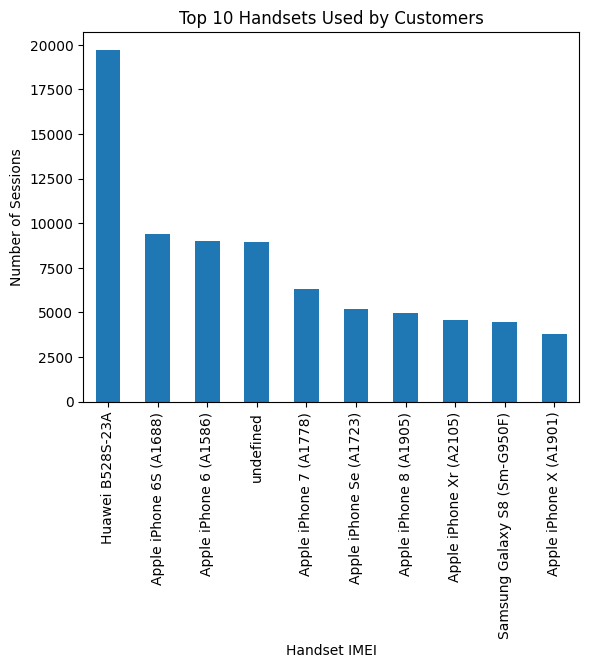

In [6]:
top_handsets.plot(kind='bar')
plt.title('Top 10 Handsets Used by Customers')
plt.xlabel('Handset IMEI')
plt.ylabel('Number of Sessions')
plt.show()

### Identify the Top 3 Handset Manufacturers

In [7]:
top_manufacturers = df['Handset Manufacturer'].value_counts().head(3)
print(top_manufacturers)

Handset Manufacturer
Apple      59464
Samsung    40579
Huawei     34366
Name: count, dtype: int64


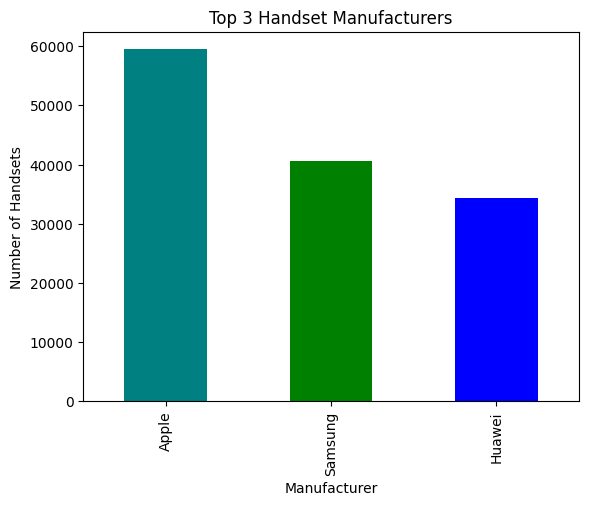

In [8]:
# Visualization
top_manufacturers.plot(kind='bar', color=['teal', 'green', 'blue'])
plt.title('Top 3 Handset Manufacturers')
plt.xlabel('Manufacturer')
plt.ylabel('Number of Handsets')
plt.show()

### Top 5 Handsets per Top 3 Handset Manufacturers

In [9]:
# Filter for top manufacturers
filtered_df = df[df['Handset Manufacturer'].isin(top_manufacturers.index)]

for manufacturer in top_manufacturers.index:
    top_handsets_manufacturer = filtered_df[filtered_df['Handset Manufacturer'] == manufacturer]['IMEI'].value_counts().head(5)
    print(f"Top 5 handsets for {manufacturer}:")
    print(top_handsets_manufacturer)

Top 5 handsets for Apple:
IMEI
3.561471e+13    8
3.554111e+13    8
3.554181e+13    8
3.594781e+13    7
3.585661e+13    7
Name: count, dtype: int64
Top 5 handsets for Samsung:
IMEI
3.518231e+13    18
3.574631e+13    17
3.528141e+13    17
3.540531e+13    15
3.564371e+13    13
Name: count, dtype: int64
Top 5 handsets for Huawei:
IMEI
8.694800e+13    16
8.672400e+13    15
8.637690e+13    11
8.637690e+13    10
8.654080e+13    10
Name: count, dtype: int64


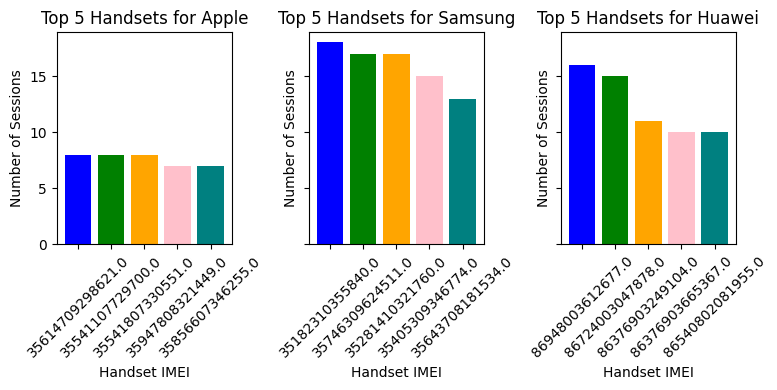

In [10]:
# Visualization
num_manufacturers = len(top_manufacturers.index)
fig, axs = plt.subplots(1, num_manufacturers, figsize=(8, 4), sharey=True)

colors = ['blue', 'green', 'orange', 'pink', 'teal']
for i, manufacturer in enumerate(top_manufacturers.index):
    top_handsets_manufacturer = filtered_df[filtered_df['Handset Manufacturer'] == manufacturer]['IMEI'].value_counts().head(5)
    
    # Plot for each manufacturer
    axs[i].bar(top_handsets_manufacturer.index.astype(str), top_handsets_manufacturer.values, color=colors[:len(top_handsets_manufacturer)])
    axs[i].set_title(f'Top 5 Handsets for {manufacturer}')
    axs[i].set_xlabel('Handset IMEI')
    axs[i].set_ylabel('Number of Sessions')
    axs[i].tick_params(axis='x', rotation=45)  # Rotate x labels if necessary

# Adjust layout
plt.tight_layout()
plt.show()

### User Behavior Aggregation

In [20]:
# Group by 'MSISDN/Number' (or user) and aggregate the required metrics
user_aggregate = df.groupby('MSISDN/Number').agg({
    'Bearer Id': 'count',                        # Number of xDR sessions
    'Dur. (ms)': 'sum',                          # Total session duration
    'Total DL (Bytes)': 'sum',                   # Total Download Data (Bytes)
    'Total UL (Bytes)': 'sum',                   # Total Upload Data (Bytes)
    'Social Media DL (Bytes)': 'sum',            # Total Social Media Download Data
    'Social Media UL (Bytes)': 'sum',            # Total Social Media Upload Data
    'Google DL (Bytes)': 'sum',                  # Total Google Download Data
    'Google UL (Bytes)': 'sum',                  # Total Google Upload Data
    'Email DL (Bytes)': 'sum',                   # Total Email Download Data
    'Email UL (Bytes)': 'sum',                   # Total Email Upload Data
    'Youtube DL (Bytes)': 'sum',                 # Total Youtube Download Data
    'Youtube UL (Bytes)': 'sum',                 # Total Youtube Upload Data
    'Netflix DL (Bytes)': 'sum',                 # Total Netflix Download Data
    'Netflix UL (Bytes)': 'sum',                 # Total Netflix Upload Data
    'Gaming DL (Bytes)': 'sum',                  # Total Gaming Download Data
    'Gaming UL (Bytes)': 'sum',                  # Total Gaming Upload Data
    'Other DL (Bytes)': 'sum',                   # Total Other Download Data
    'Other UL (Bytes)': 'sum'                    # Total Other Upload Data
}).reset_index()

# Rename columns for better clarity
user_aggregate.rename(columns={
    'Bearer Id': 'xDR Sessions',
    'Dur. (ms)': 'Total Session Duration (ms)',
    'Total DL (Bytes)': 'Total DL Data (Bytes)',
    'Total UL (Bytes)': 'Total UL Data (Bytes)',
}, inplace=True)

# Display the result
user_aggregate.head()

,MSISDN/Number,xDR Sessions,Total Session Duration (ms),Total DL Data (Bytes),Total UL Data (Bytes),Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes)
0,3.360100e+10,1,116720.0,8.426375e+08,36053108.0,2206504.0,25631.0,3337123.0,1051882.0,837400.0,493962.0,14900201.0,6724347.0,10265105.0,16915876.0,8.110911e+08,1367528.0,377096990.0,9473882.0
1,3.360100e+10,1,181230.0,1.207552e+08,36104459.0,2598548.0,62017.0,4197697.0,1137166.0,2828821.0,478960.0,5324251.0,7107972.0,770569.0,10451194.0,1.050353e+08,14714780.0,279557701.0,2152370.0
2,3.360100e+10,1,134969.0,5.566597e+08,39306820.0,3148004.0,47619.0,3343483.0,99643.0,2436500.0,768880.0,2137272.0,19196298.0,16525919.0,2827981.0,5.290685e+08,9759228.0,495086501.0,6607171.0
3,3.360101e+10,1,49878.0,4.019932e+08,20327526.0,251469.0,28825.0,5937765.0,3740728.0,2178618.0,106052.0,4393123.0,2584198.0,1157362.0,784730.0,3.880748e+08,3051292.0,25248001.0,10031701.0
4,3.360101e+10,2,37104.0,1.363130e+09,94280527.0,2861230.0,51312.0,13728668.0,4770948.0,2247808.0,1057661.0,10339971.0,31193031.0,24971647.0,24230077.0,1.308981e+09,5816727.0,777643713.0,27160771.0


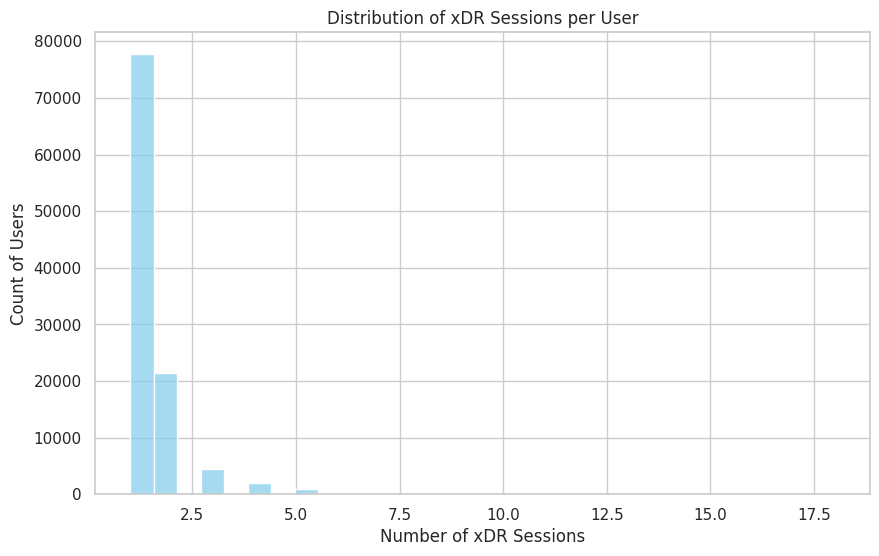

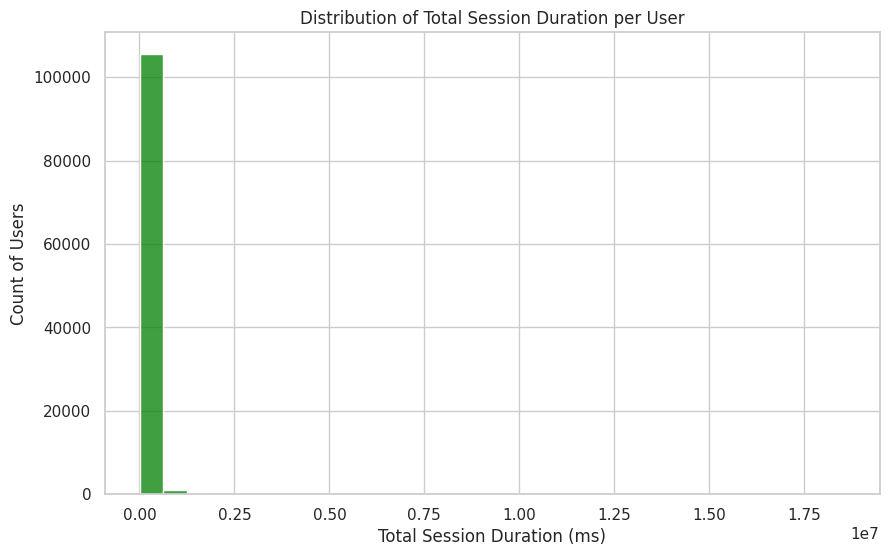

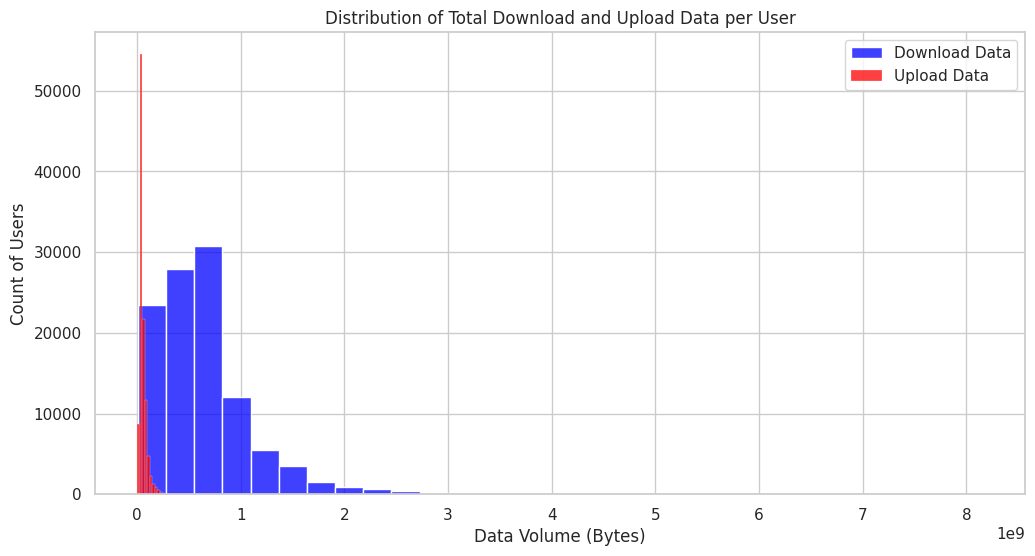

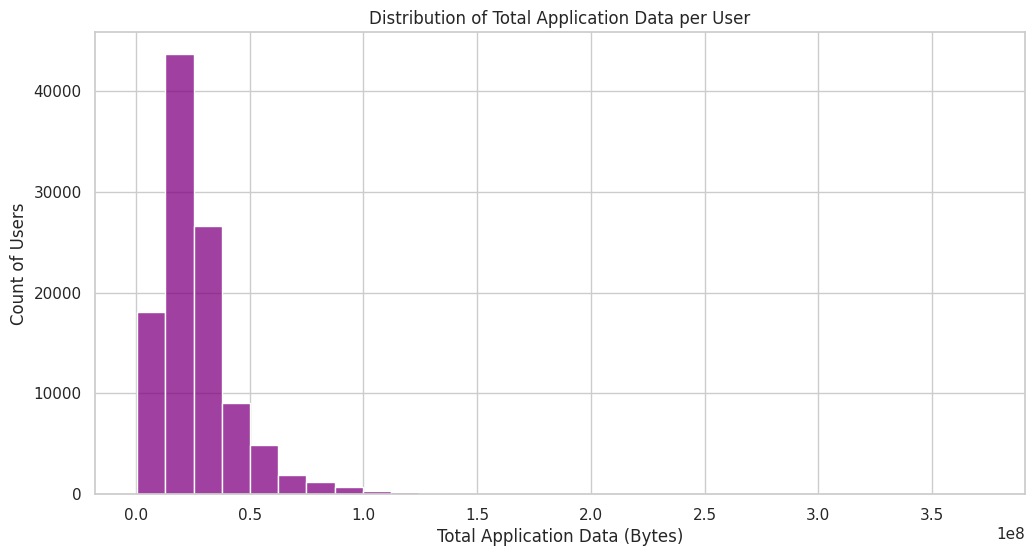

In [22]:
# Set the style for the plots
sns.set(style="whitegrid")

# Plot 1: Distribution of xDR Sessions per User
plt.figure(figsize=(10, 6))
sns.histplot(user_aggregate['xDR Sessions'], kde=False, bins=30, color='skyblue')
plt.title('Distribution of xDR Sessions per User')
plt.xlabel('Number of xDR Sessions')
plt.ylabel('Count of Users')
plt.show()

# Plot 2: Total Session Duration per User
plt.figure(figsize=(10, 6))
sns.histplot(user_aggregate['Total Session Duration (ms)'], kde=False, bins=30, color='green')
plt.title('Distribution of Total Session Duration per User')
plt.xlabel('Total Session Duration (ms)')
plt.ylabel('Count of Users')
plt.show()

# Plot 3: Total Download (DL) and Upload (UL) Data per User
plt.figure(figsize=(12, 6))
sns.histplot(user_aggregate['Total DL Data (Bytes)'], color='blue', label='Download Data', bins=30)
sns.histplot(user_aggregate['Total UL Data (Bytes)'], color='red', label='Upload Data', bins=30)
plt.title('Distribution of Total Download and Upload Data per User')
plt.xlabel('Data Volume (Bytes)')
plt.ylabel('Count of Users')
plt.legend()
plt.show()

# Plot 4: Total Data Volume by Application (Social Media, Google, Youtube)
app_columns = ['Social Media DL (Bytes)', 'Google DL (Bytes)', 'Youtube DL (Bytes)']
user_aggregate['Total App Data (Bytes)'] = user_aggregate[app_columns].sum(axis=1)

plt.figure(figsize=(12, 6))
sns.histplot(user_aggregate['Total App Data (Bytes)'], kde=False, bins=30, color='purple')
plt.title('Distribution of Total Application Data per User')
plt.xlabel('Total Application Data (Bytes)')
plt.ylabel('Count of Users')
plt.show()

### Exploratory Data Analysis (EDA)

### Variable Descriptions

In [23]:
# Overview of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148935 entries, 0 to 148934
Data columns (total 45 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Bearer Id                       148935 non-null  float64
 1   Start                           148935 non-null  object 
 2   Start ms                        148935 non-null  float64
 3   End                             148935 non-null  object 
 4   End ms                          148935 non-null  float64
 5   Dur. (ms)                       148935 non-null  float64
 6   IMSI                            148935 non-null  float64
 7   MSISDN/Number                   148935 non-null  float64
 8   IMEI                            148935 non-null  float64
 9   Last Location Name              148935 non-null  object 
 10  Avg RTT DL (ms)                 148935 non-null  float64
 11  Avg RTT UL (ms)                 148935 non-null  float64
 12  Avg Bearer TP DL

In [24]:
# Summary statistics for quantitative variables
df.describe()

,Bearer Id,Start ms,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
count,1.489350e+05,148935.000000,148935.000000,1.489350e+05,1.489350e+05,1.489350e+05,1.489350e+05,148935.000000,148935.000000,148935.000000,...,1.489350e+05,1.489350e+05,1.489350e+05,1.489350e+05,1.489350e+05,1.489350e+05,1.489350e+05,1.489350e+05,1.489350e+05,1.489350e+05
mean,1.015510e+19,499.246732,498.675442,1.048702e+05,2.082016e+14,4.188282e+10,4.849493e+13,93.334132,15.293235,13286.171390,...,1.163345e+07,1.100867e+07,1.162756e+07,1.100017e+07,4.220256e+08,8.289085e+06,4.211473e+08,8.263189e+06,4.111764e+07,4.546251e+08
std,2.893257e+18,288.555630,288.089136,8.106343e+04,1.522166e+10,2.447443e+12,2.242829e+13,537.222862,76.683630,23978.591234,...,6.711384e+06,6.345428e+06,6.724686e+06,6.358918e+06,2.439763e+08,4.782090e+06,2.431970e+08,4.768708e+06,1.127933e+07,2.441528e+08
min,6.917538e+18,0.000000,0.000000,7.142000e+03,2.040471e+14,3.360100e+10,4.400152e+11,0.000000,0.000000,0.000000,...,5.300000e+01,1.050000e+02,4.200000e+01,3.500000e+01,2.516000e+03,5.900000e+01,3.290000e+03,1.480000e+02,2.866892e+06,7.114041e+06
25%,7.349883e+18,250.000000,251.000000,5.788350e+04,2.082014e+14,3.365130e+10,3.546071e+13,28.000000,3.000000,43.000000,...,5.831331e+06,5.516710e+06,5.779947e+06,5.474451e+06,2.104587e+08,4.130162e+06,2.102119e+08,4.145072e+06,3.321774e+07,2.430996e+08
50%,7.349883e+18,499.000000,500.000000,8.639900e+04,2.082015e+14,3.366371e+10,3.572221e+13,38.000000,5.000000,63.000000,...,1.161638e+07,1.101329e+07,1.164269e+07,1.099563e+07,4.234208e+08,8.291222e+06,4.218716e+08,8.266089e+06,4.114101e+07,4.558708e+08
75%,1.304243e+19,749.000000,750.000000,1.327000e+05,2.082018e+14,3.368349e+10,8.611970e+13,62.000000,11.000000,19681.000000,...,1.744571e+07,1.651442e+07,1.747072e+07,1.650429e+07,6.331620e+08,1.243184e+07,6.316602e+08,1.238204e+07,4.903248e+07,6.656577e+08
max,1.318654e+19,999.000000,999.000000,1.859336e+06,2.082522e+14,8.823971e+14,9.900120e+13,96923.000000,7120.000000,378160.000000,...,2.325910e+07,2.201196e+07,2.325919e+07,2.201196e+07,8.434419e+08,1.655879e+07,8.434425e+08,1.655882e+07,7.833131e+07,9.029696e+08


In [25]:
# Checking for missing values
df.isnull().sum()

Bearer Id                         0
Start                             0
Start ms                          0
End                               0
End ms                            0
Dur. (ms)                         0
IMSI                              0
MSISDN/Number                     0
IMEI                              0
Last Location Name                0
Avg RTT DL (ms)                   0
Avg RTT UL (ms)                   0
Avg Bearer TP DL (kbps)           0
Avg Bearer TP UL (kbps)           0
DL TP < 50 Kbps (%)               0
50 Kbps < DL TP < 250 Kbps (%)    0
250 Kbps < DL TP < 1 Mbps (%)     0
DL TP > 1 Mbps (%)                0
UL TP < 10 Kbps (%)               0
10 Kbps < UL TP < 50 Kbps (%)     0
50 Kbps < UL TP < 300 Kbps (%)    0
UL TP > 300 Kbps (%)              0
Activity Duration DL (ms)         0
Activity Duration UL (ms)         0
Dur. (ms).1                       0
Handset Manufacturer              0
Handset Type                      0
Nb of sec with Vol DL < 6250

Quantitative variables: like Session Duration, Total Download (DL), Total Upload (UL).

Categorical variables: such as Handset Manufacturer, Application Name.

### Variable Transformation & User Segmentation

Segment users into top five decile classes based on the total session duration

In [30]:
# Ensure total session duration is calculated for each user
df['Total Duration'] = df.groupby('IMSI')['Dur. (ms)'].transform('sum')

# Segment users into deciles based on total duration
df['Duration Decile'] = pd.qcut(df['Total Duration'], 10, labels=False)

# Calculate the total data volume (DL + UL) per decile
df['Total Data'] = df['Total DL (Bytes)'] + df['Total UL (Bytes)']
decile_data = df.groupby('Duration Decile')['Total Data'].sum().reset_index()

# Renaming the deciles
decile_data['Duration Decile'] = decile_data['Duration Decile'] + 1  # To label as 1 to 10 instead of 0 to 9
decile_data.columns = ['Decile Class', 'Total Data']

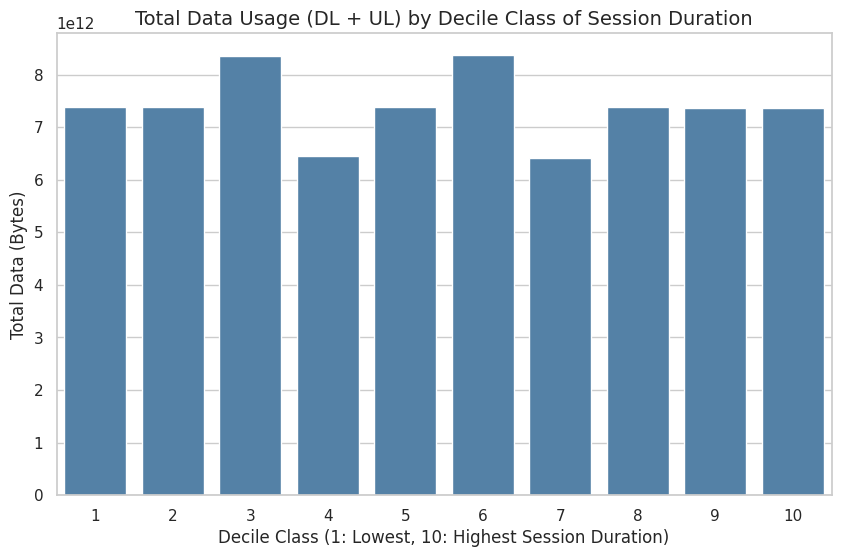

In [32]:
# Plotting the total data per decile class without the palette argument
plt.figure(figsize=(10, 6))
sns.barplot(x='Decile Class', y='Total Data', data=decile_data, color='steelblue')

# Adding labels and title
plt.title('Total Data Usage (DL + UL) by Decile Class of Session Duration', fontsize=14)
plt.xlabel('Decile Class (1: Lowest, 10: Highest Session Duration)', fontsize=12)
plt.ylabel('Total Data (Bytes)', fontsize=12)

# Display the plot
plt.show()

In [33]:
# convert the data type of 'IMEI', 'IMSI', 'MSISDN/Number' to str

to_string = ['IMEI', 'IMSI', 'MSISDN/Number']

for col in to_string:
    df[col] = df[col].astype('category')

In [34]:
central_tendency_measure = pd.DataFrame(
    { 
     'mean': df.mean(numeric_only=True).values, 
     'median': df.median(numeric_only=True).values,
     'mode': df.mode(numeric_only=True).rename(columns={0: "mode"}).iloc[0].values,
     'min': df.min(numeric_only=True).values,
     'max': df.max(numeric_only=True).values
    }, index=df.select_dtypes(include=np.number).columns.tolist())

central_tendency_measure

,mean,median,mode,min,max
Bearer Id,1.015510e+19,7.349883e+18,1.304243e+19,6.917538e+18,1.318654e+19
Start ms,4.992467e+02,4.990000e+02,3.410000e+02,0.000000e+00,9.990000e+02
End ms,4.986754e+02,5.000000e+02,8.720000e+02,0.000000e+00,9.990000e+02
Dur. (ms),1.048702e+05,8.639900e+04,8.639900e+04,7.142000e+03,1.859336e+06
Avg RTT DL (ms),9.333413e+01,3.800000e+01,2.800000e+01,0.000000e+00,9.692300e+04
Avg RTT UL (ms),1.529324e+01,5.000000e+00,5.000000e+00,0.000000e+00,7.120000e+03
Avg Bearer TP DL (kbps),1.328617e+04,6.300000e+01,2.300000e+01,0.000000e+00,3.781600e+05
Avg Bearer TP UL (kbps),1.770786e+03,6.300000e+01,4.000000e+01,0.000000e+00,5.861300e+04
DL TP < 50 Kbps (%),9.289889e+01,1.000000e+02,1.000000e+02,0.000000e+00,1.000000e+02
50 Kbps < DL TP < 250 Kbps (%),3.043106e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.300000e+01


### Univariate Analysis

#### Non-Graphical Analysis

In [29]:
# Dispersion Parameters
dispersion = df.describe()
dispersion

,Bearer Id,Start ms,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),...,Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes),Total Duration,Duration Decile,Total Data
count,1.489350e+05,148935.000000,148935.000000,1.489350e+05,1.489350e+05,1.489350e+05,1.489350e+05,148935.000000,148935.000000,148935.000000,...,1.489350e+05,1.489350e+05,1.489350e+05,1.489350e+05,1.489350e+05,1.489350e+05,1.489350e+05,1.489350e+05,148935.000000,1.489350e+05
mean,1.015510e+19,499.246732,498.675442,1.048702e+05,2.082016e+14,4.188282e+10,4.849493e+13,93.334132,15.293235,13286.171390,...,1.100017e+07,4.220256e+08,8.289085e+06,4.211473e+08,8.263189e+06,4.111764e+07,4.546251e+08,2.146920e+05,4.474308,4.957428e+08
std,2.893257e+18,288.555630,288.089136,8.106343e+04,1.522166e+10,2.447443e+12,2.242829e+13,537.222862,76.683630,23978.591234,...,6.358918e+06,2.439763e+08,4.782090e+06,2.431970e+08,4.768708e+06,1.127933e+07,2.441528e+08,4.117646e+05,2.876418,2.443876e+08
min,6.917538e+18,0.000000,0.000000,7.142000e+03,2.040471e+14,3.360100e+10,4.400152e+11,0.000000,0.000000,0.000000,...,3.500000e+01,2.516000e+03,5.900000e+01,3.290000e+03,1.480000e+02,2.866892e+06,7.114041e+06,7.142000e+03,0.000000,2.895611e+07
25%,7.349883e+18,250.000000,251.000000,5.788350e+04,2.082014e+14,3.365130e+10,3.546071e+13,28.000000,3.000000,43.000000,...,5.474451e+06,2.104587e+08,4.130162e+06,2.102119e+08,4.145072e+06,3.321774e+07,2.430996e+08,8.621050e+04,2.000000,2.844641e+08
50%,7.349883e+18,499.000000,500.000000,8.639900e+04,2.082015e+14,3.366371e+10,3.572221e+13,38.000000,5.000000,63.000000,...,1.099563e+07,4.234208e+08,8.291222e+06,4.218716e+08,8.266089e+06,4.114101e+07,4.558708e+08,1.385280e+05,4.000000,4.968460e+08
75%,1.304243e+19,749.000000,750.000000,1.327000e+05,2.082018e+14,3.368349e+10,8.611970e+13,62.000000,11.000000,19681.000000,...,1.650429e+07,6.331620e+08,1.243184e+07,6.316602e+08,1.238204e+07,4.903248e+07,6.656577e+08,2.492785e+05,7.000000,7.064483e+08
max,1.318654e+19,999.000000,999.000000,1.859336e+06,2.082522e+14,8.823971e+14,9.900120e+13,96923.000000,7120.000000,378160.000000,...,2.201196e+07,8.434419e+08,1.655879e+07,8.434425e+08,1.655882e+07,7.833131e+07,9.029696e+08,1.855375e+07,9.000000,9.559848e+08


### Graphical Analysis:

In [36]:
import re
def get_column_with_string(df: pd.DataFrame, text):
    return [col for col in df.columns if re.findall(text, col) != []]

In [37]:
columns = get_column_with_string(df, 'Bytes')

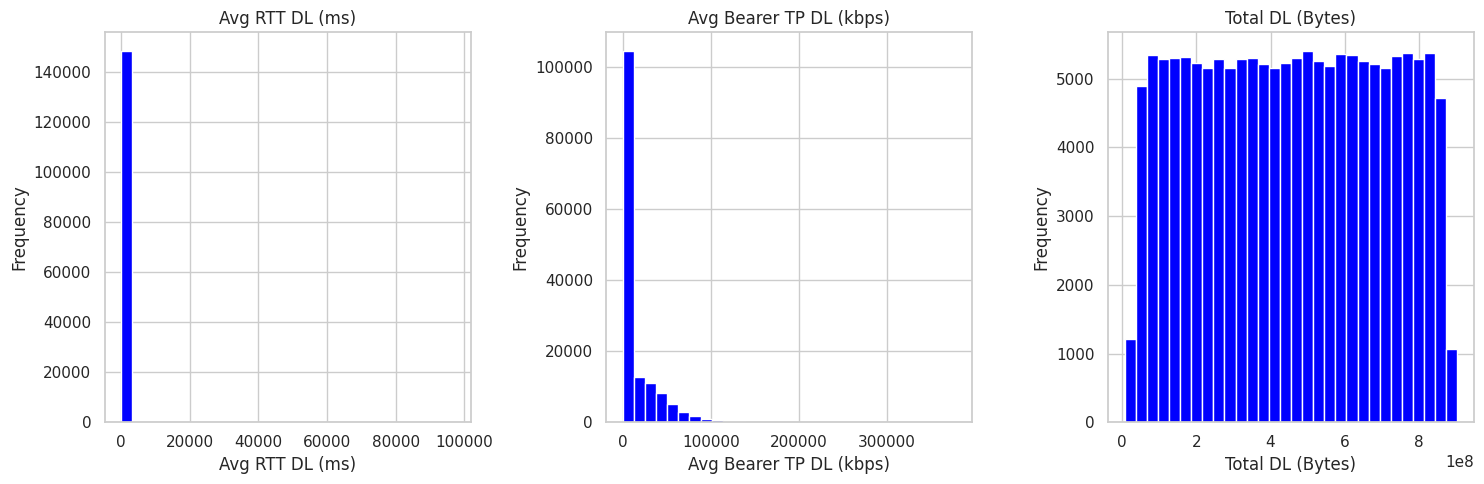

In [39]:
import matplotlib.pyplot as plt

def plot_many_hist(df, columns, color='blue'):
    # Determine the number of rows and columns for the subplot grid
    n_cols = 3  # Number of columns in the subplot grid
    n_rows = len(columns) // n_cols + (len(columns) % n_cols > 0)

    # Create a figure and axes
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))

    # Flatten the axes array for easier iteration
    axes = axes.flatten()

    # Loop through the columns and plot histograms
    for i, col in enumerate(columns):
        if col in df.columns:
            axes[i].hist(df[col].dropna(), bins=30, color=color)  # Drop missing values for clean plotting
            axes[i].set_title(col)
            axes[i].set_xlabel(col)
            axes[i].set_ylabel('Frequency')

    # Remove any unused axes in case the number of columns is not a perfect multiple of n_cols
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    # Adjust layout for better appearance
    plt.tight_layout()
    plt.show()

# Example usage:
columns = ['Avg RTT DL (ms)', 'Avg Bearer TP DL (kbps)', 'Total DL (Bytes)']
plot_many_hist(df, columns)

Text(0.5, 1.0, 'Total Data Distribution')

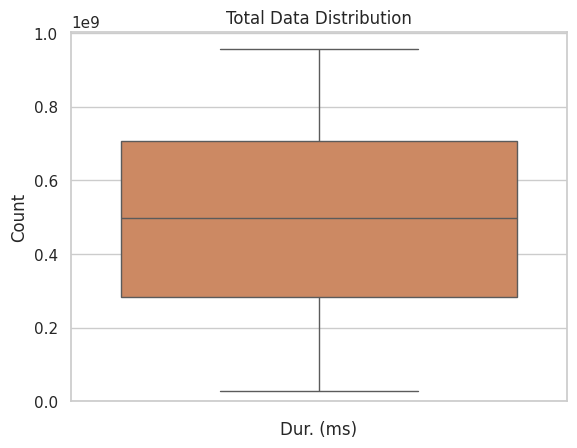

In [35]:
# Histogram for session duration
sns.histplot(df['Dur. (ms)'])
plt.title('Distribution of Session Duration')

# Boxplot for total data (DL + UL)
sns.boxplot(y='Total Data', data=df)
plt.title('Total Data Distribution')

### Bivariate Analysis

Scatter plots to explore relationships between Total DL (Bytes) and Total UL (Bytes).

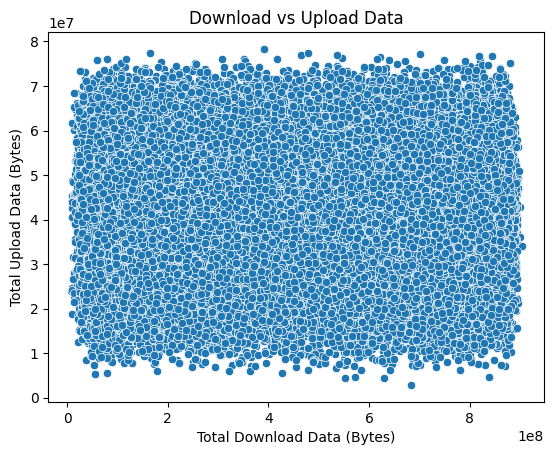

In [16]:
sns.scatterplot(x='Total DL (Bytes)', y='Total UL (Bytes)', data=df)
plt.title('Download vs Upload Data')
plt.xlabel('Total Download Data (Bytes)')
plt.ylabel('Total Upload Data (Bytes)')
plt.show()

### Correlation Analysis

Heatmap to show correlations between different data columns.

<Axes: >

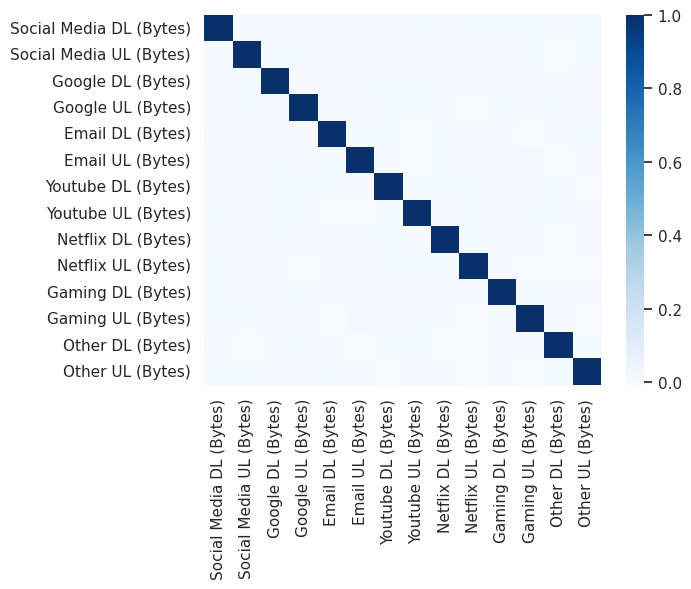

In [41]:
corr = df[['Social Media DL (Bytes)','Social Media UL (Bytes)', 
 'Google DL (Bytes)', 'Google UL (Bytes)',
'Email DL (Bytes)', 'Email UL (Bytes)',
'Youtube DL (Bytes)','Youtube UL (Bytes)', 
'Netflix DL (Bytes)', 'Netflix UL (Bytes)',
'Gaming DL (Bytes)', 'Gaming UL (Bytes)', 
'Other DL (Bytes)', 'Other UL (Bytes)']].corr()

# plot the heatmap
sns.heatmap(corr,cmap='Blues',
            xticklabels=corr.columns,
            yticklabels=corr.columns)

### Dimensionality Reduction

Use PCA to reduce dimensions and visualize.

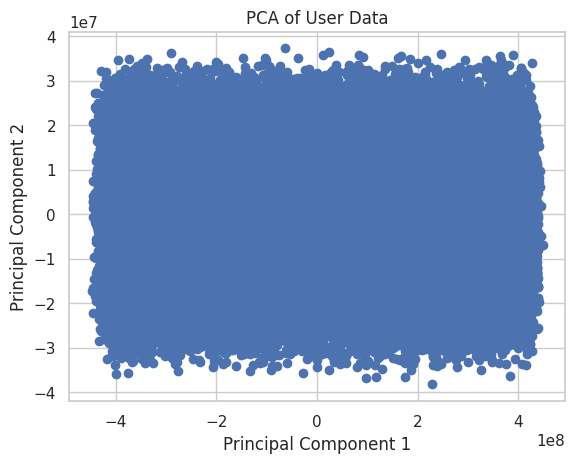

In [43]:
from sklearn.decomposition import PCA

# Assume relevant columns for PCA
data_for_pca = df[['Total DL (Bytes)', 'Total UL (Bytes)', 'Dur. (ms)']]
pca = PCA(n_components=2)
pca_result = pca.fit_transform(data_for_pca)

plt.scatter(pca_result[:, 0], pca_result[:, 1])
plt.title('PCA of User Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()